In [39]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import numpy as np
import tables

import cascade_ode as code
import init_ode

import earth

# Helper functions definitions

In [40]:
gamma = 2 #spectral index of incoming neutrino flux
flavor = 2 # Negative for antineutrinos, positive for neutrinos. Value doesn't matter since we plot them all
flavor_classic = 2 # Flavor to plot when comparing with NuFATE classic, below

In [41]:
def get_att_ode(flavor,gamma,zenith,h5_filename,prefactor=1e70,relerr=1e-4):

    [phi_0,RHSMatrix,energy_nodes,energy_tau] = init_ode.init(flavor,gamma,h5_filename,prefactor)
    [r_e, r_mu, r_tau, phi_tau] = code.cascade(zenith,phi_0,RHSMatrix,energy_nodes,energy_tau,prefactor,relerr)

    return energy_nodes, energy_tau, r_e, r_mu, r_tau, phi_tau

# Example Earth attenuation for single flavor and zenith

In [42]:
zenith =  np.arccos(.99)+np.pi/2.#np.radians(180)
#prefactor to avoid negative solutions, absent to use default value 1e70
prefactor = 1e70
#relative error of the solutions, absent to use default value 1e-4
relerr = 1e-3
h5_filename = '../../resources/NuFATECrossSections.h5'

[energy_nodes,energy_tau,r_e,r_mu,r_tau,phi_tau]=get_att_ode(flavor,gamma,zenith,h5_filename,prefactor,relerr)

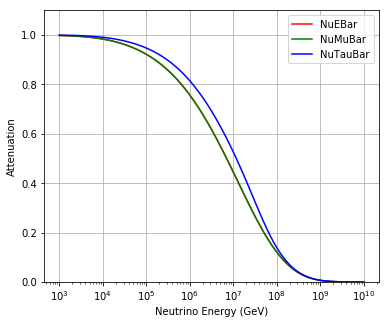

In [43]:
plt.figure(figsize=(6,5))
plt.semilogx(energy_nodes,r_e,c='r')
plt.semilogx(energy_nodes,r_mu,c='g')
plt.semilogx(energy_nodes,r_tau,c='b')
plt.xlabel(r"Neutrino Energy (GeV)")
plt.ylim(0.,1.1)
plt.ylabel(r"Attenuation")
plt.legend(["NuEBar", "NuMuBar", "NuTauBar"])
plt.grid()

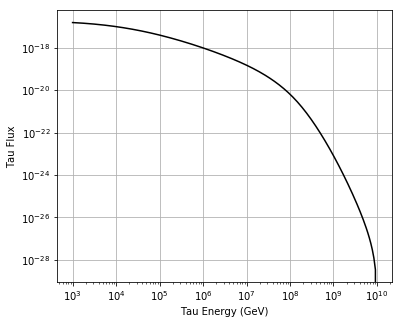

In [44]:
plt.figure(figsize=(6,5))
plt.loglog(energy_tau,phi_tau,c='k')
plt.xlabel(r"Tau Energy (GeV)")
plt.ylabel(r"Tau Flux")
plt.grid()

# Compare with classical nuFATE

In [45]:
import cascade as cas
# import cascade_secs as cas # Use this if you want secondaries

w,v,ci,energy_nodes,phi_0 = cas.get_eigs(flavor_classic,gamma, "../../resources/NuFATECrossSections.h5")
Na = 6.0221415e23
t = earth.get_t_earth(zenith)*Na
phisol = np.dot(v,(ci*np.exp(w*t)))/phi_0
# phisol = phisol[0:200] #Use this if you want secondaries

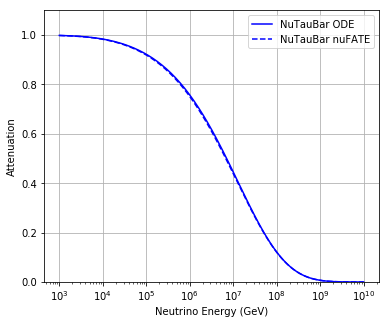

In [46]:
plt.figure(figsize=(6,5))
plt.semilogx(energy_nodes, r_mu, c='b',linestyle='-')
plt.semilogx(energy_nodes, phisol,c='b',linestyle='--')
plt.xlabel(r"Neutrino Energy (GeV)")
plt.ylim(0.,1.1)
# plt.xlim(1e6,1e9)
plt.ylabel(r"Attenuation")
plt.legend(["NuTauBar ODE", "NuTauBar nuFATE"])
plt.grid()